# 데이터 로딩
- 사용자-영화 평점 행렬 데이터 사용
- Grouplens 사이트에서 만든 MovieLens 데이터 셋 사용
- https://grouplens.org/datasets/movielens/latest

In [12]:
import pandas as pd
import numpy as np

movies = pd.read_csv('./dataset/movies.csv')
ratings = pd.read_csv('./dataset/ratings.csv')
print(movies.shape)
print(ratings.shape)

(9742, 3)
(100836, 4)


In [9]:
display(movies.head())
display(ratings.head())

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
print(ratings['userId'].unique().size)

610


# 데이터 전처리
- 평점 데이터가 행 단위(테이블 형식) 데이터로 되어 있어서 사용자-아이템(영화) 평점 행렬로 변환 필요

In [13]:
ratings = ratings.drop('timestamp', axis=1)
ratings_matrix = pd.pivot_table(ratings, index='userId', columns='movieId', values='rating')

In [16]:
print(ratings_matrix.shape)
display(ratings_matrix.head(3))
print(ratings['rating'].min(), ratings['rating'].max())

(610, 9724)


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0.5 5.0


- 영화 아이디를 영화 제목으로 변환하기 위해 ratings 데이터와 movies 데이터 병합
- 관람하지 않은 영화의 평점은 0으로 변경

In [18]:
ratings_movies = pd.merge(ratings, movies)
ratings_matrix = pd.pivot_table(ratings_movies, index='userId', columns='title', values='rating')
ratings_matrix = ratings_matrix.fillna(0)
display(ratings_matrix.head(3))

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 영화와 영화들 간 유사도 산출
- cosine_similarity()를 이용하여 영화와 영화들 간의 유사도를 산출하기 위해 rating_matrix를, 영화를 행 기준으로 만들기 위해, 전치시켜야 함

In [21]:
ratings_matrix_T = ratings_matrix.T
display(ratings_matrix_T.head(3))

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from sklearn.metrics.pairwise import cosine_similarity

item_sims = cosine_similarity(ratings_matrix_T, ratings_matrix_T)
item_sims_df = pd.DataFrame(item_sims, index=ratings_matrix.columns, columns=ratings_matrix.columns)
print(item_sims_df.shape)
display(item_sims_df.head(3))

(9719, 9719)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,0.707107,1.000000,0.0,0.0,0.0,0.176777,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [24]:
item_sims_df.columns[item_sims_df.columns.str.contains('Godfather')]

Index(['Godfather, The (1972)', 'Godfather: Part II, The (1974)',
       'Godfather: Part III, The (1990)',
       'The Godfather Trilogy: 1972-1990 (1992)', 'Tokyo Godfathers (2003)'],
      dtype='object', name='title')

In [26]:
# 영화 'Godfather, The (1972)'와 평점 유사도가 높은 상위 5개 영화 확인 
item_sims_df['Godfather, The (1972)'].sort_values(ascending=False)[:5]

title
Godfather, The (1972)                        1.000000
Godfather: Part II, The (1974)               0.821773
Goodfellas (1990)                            0.664841
One Flew Over the Cuckoo's Nest (1975)       0.620536
Star Wars: Episode IV - A New Hope (1977)    0.595317
Name: Godfather, The (1972), dtype: float64

# 아이템 기반 최근접 이웃 협업 필터링으로 개인화된 영화 추천
- 앞서 만든 아이템 기반 영화 유사도 데이터는 모든 사용자의 평점을 기준으로 영화의 유사도 생성
- 최근접 이웃 협업 필터링을 통한 개인화된 영화 추천은 `개인이 아직 관람하지 않은 영화를 추천`하는 방식이어야 한다.
- 아직 관람하지 않은 영화에 대해 `아이템 유사도`와 `기존에 관람한 영화의 평점 데이터`를 기반으로 새롭게 모든 영화의 예측 평점을 계산한 후, 높은 예측 평점을 가진 영화를 추천해야 함

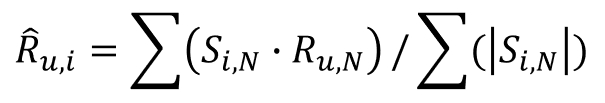
- R_hat(u,i): 사용자 u, 아이템 i의 개인화된 예측 평점 값
- S(i,N): 아이템 i와 가장 유사도 높은 Top-N개 아이템의 유사도 벡터
- R(u,N): 사용자 u의 아이템 i와 가장 유사도가 높은 Top-N개의 아이템에 대한 실제 평점 벡터. 즉, 내가 본 영화 중 아직 관람하지 않은 영화와 유사도가 높은 영화의 실제 평점
- 정규화를 위해서 S(i,N)의 절대값으로 나눈다.

In [27]:
# ratings_arr: 사용자 영화 평점 행렬, shape: (610, 9719)
# item_sim_arr: 영화 간 평점 유사도 행렬, shape: (9719, 9719)
def predict_rating_topsim(ratings_arr, item_sim_arr, n=20):
    pred = np.zeros_like(ratings_arr)  # R_hat 값 0으로 초기화

    for col in range(ratings_arr.shape[1]):  # 영화의 수만큼 반복 수행
        # 유사도 행렬에서 col번째 영화와 평점 유사도가 높은 n개 영화의 index 값 반환
        top_n_items = np.argsort(item_sim_arr[:,col])[::-1][:n]
        for row in range(ratings_arr.shape[0]):  # 사용자 수만큼 반복
            pred[row, col] = item_sim_arr[col,:][top_n_items].dot(ratings_arr[row,:][top_n_items])
            pred[row, col] /= np.sum(np.abs(item_sim_arr[col,:][top_n_items]))
    return pred

In [28]:
ratings_pred = predict_rating_topsim(ratings_matrix.values, item_sims_df.values, n=20)

In [29]:
ratings_pred_matrix = pd.DataFrame(ratings_pred, index=ratings_matrix.index, columns=ratings_matrix.columns)
print(ratings_pred_matrix.shape)

(610, 9719)


In [31]:
# 첫 번째 유저의 9719개의 영화에 대한 예측 평점 최소, 최대 값 확인
print(np.max(ratings_pred_matrix, axis=1)[:1])
print(np.min(ratings_pred_matrix, axis=1)[:1])

userId
1    4.595776
dtype: float64
userId
1    0.0
dtype: float64


In [32]:
# 첫 번째 유저의 9719개의 영화에 대한 예측 평점 중 0점이 아닌 영화의 수
user_0 = ratings_pred_matrix.values[0]
print(len(user_0[user_0 != 0]))

1133


- userId = 9가 평점을 준 영화 중 평점이 높은 순서 10개 추출

In [36]:
user_rating_id = ratings_matrix.loc[9, :]
user_rating_id[user_rating_id != 0].sort_values(ascending=False)[:10]

title
Adaptation (2002)                                                                 5.0
Citizen Kane (1941)                                                               5.0
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    5.0
Producers, The (1968)                                                             5.0
Lord of the Rings: The Two Towers, The (2002)                                     5.0
Lord of the Rings: The Fellowship of the Ring, The (2001)                         5.0
Back to the Future (1985)                                                         5.0
Austin Powers in Goldmember (2002)                                                5.0
Minority Report (2002)                                                            4.0
Witness (1985)                                                                    4.0
Name: 9, dtype: float64

# 평점을 주지 않은 영화(관람하지 않은 영화) 리스트 반환 함수 정의

In [37]:
user_rating = ratings_matrix.loc[9,:]
print(user_rating.index.values)

["'71 (2014)" "'Hellboy': The Seeds of Creation (2004)"
 "'Round Midnight (1986)" ... 'xXx: State of the Union (2005)'
 '¡Three Amigos! (1986)' 'À nous la liberté (Freedom for Us) (1931)']


In [38]:
def get_unseen_movies(rating_matrix, userId):
    user_rating = ratings_matrix.loc[userId,:]  # Series 객체 반환
    unseen_list = user_rating[user_rating == 0].index.values  # 관람하지 않은 영화 제목만 ndarray로 반환
    return unseen_list

# 특정 사용자의 관람하지 않은 영화에 대한 예측 평점 기반 추천

In [39]:
unseen_list = get_unseen_movies(ratings_matrix, userId=9)
ratings_pred_matrix.loc[9, unseen_list]

title
'71 (2014)                                                0.0
'Hellboy': The Seeds of Creation (2004)                   0.0
'Round Midnight (1986)                                    0.0
'Salem's Lot (2004)                                       0.0
'Til There Was You (1997)                                 0.0
                                                         ... 
anohana: The Flower We Saw That Day - The Movie (2013)    0.0
eXistenZ (1999)                                           0.0
xXx: State of the Union (2005)                            0.0
¡Three Amigos! (1986)                                     0.0
À nous la liberté (Freedom for Us) (1931)                 0.0
Name: 9, Length: 9673, dtype: float64

In [44]:
# 예측 평점 DataFrame에서 사용자 id와 uunseen_list로 들어온 영화명 컬럼을 추출해 가장 예측 평점이 높은 순으로 정렬하여 
# 상위 n개 추출
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    return pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]

unseen_list = get_unseen_movies(ratings_matrix, userId=9)
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)  # 시리즈 형태 결과
recomm_movies = pd.DataFrame(recomm_movies.values, index=recomm_movies.index, columns=['pred score'])  # 데이터프레임으로 변환
display(recomm_movies)

,pred score
title,
Shrek (2001),0.866202
Spider-Man (2002),0.857854
"Last Samurai, The (2003)",0.817473
Indiana Jones and the Temple of Doom (1984),0.816626
"Matrix Reloaded, The (2003)",0.800990
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),0.765159
Gladiator (2000),0.740956
"Matrix, The (1999)",0.732693
Pirates of the Caribbean: The Curse of the Black Pearl (2003),0.689591
